In [ ]:
import numpy as np
import numpy.typing as npt
import matplotlib.pyplot as plt

from pedestrian_path_env import env, STATE_SIZE, ACTION_SIZE
from agents import SARSAAgent, QLearningAgent

# Old training code

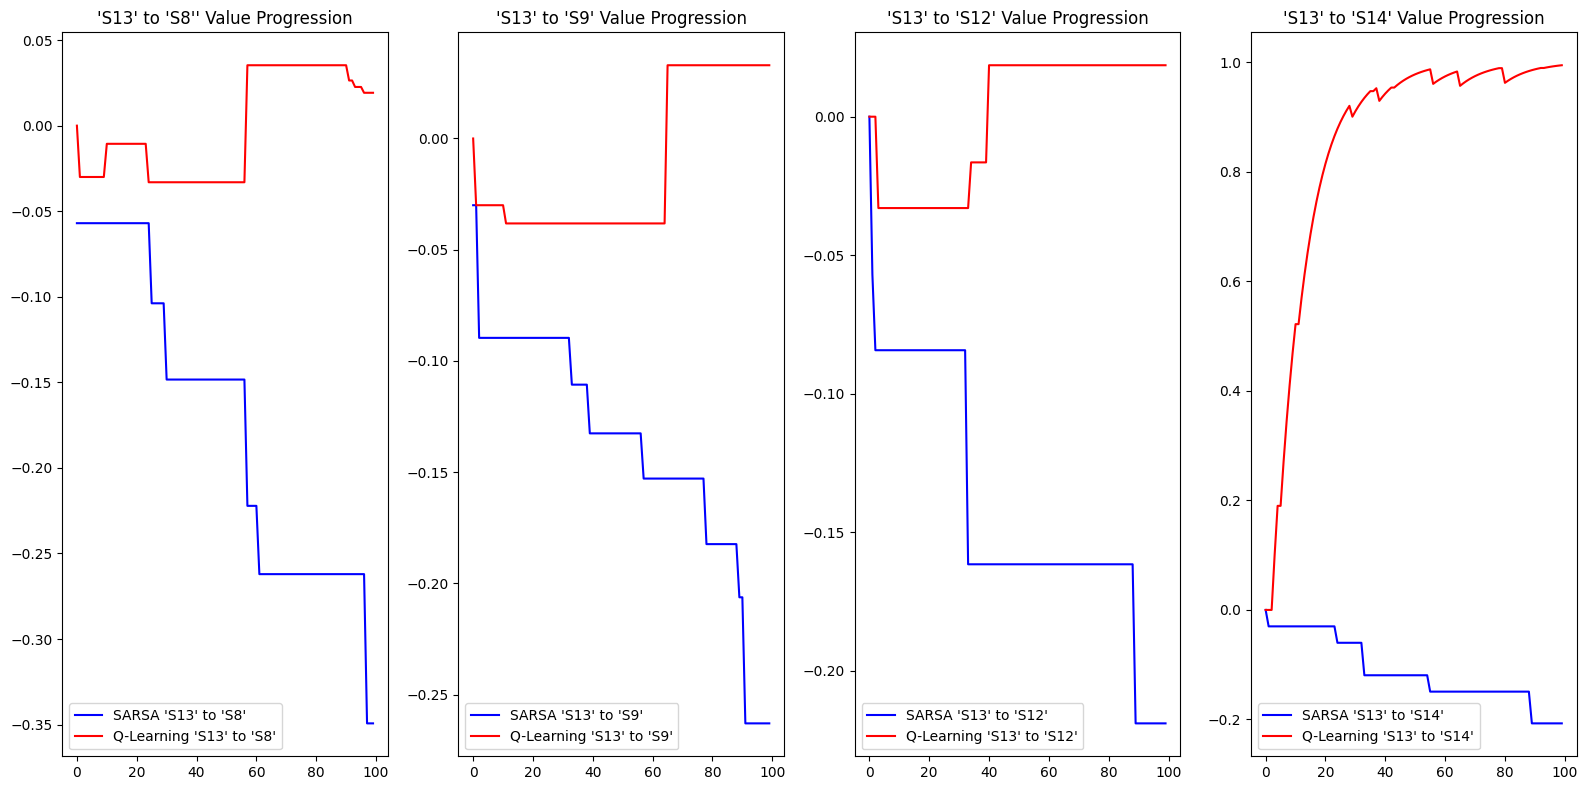

In [ ]:
# Training parameters
num_episodes = 100

# Initialize agents
sarsa_agent = SARSAAgent(env, state_size=STATE_SIZE, action_size=ACTION_SIZE)
q_learning_agent = QLearningAgent(env, state_size=STATE_SIZE, action_size=ACTION_SIZE)

# Store Q-table updates over episodes
sarsa_q_tables: list[npt.NDArray[np.float64]] = []
q_learning_q_tables: list[npt.NDArray[np.float64]] = []

# Train both agents
for episode in range(num_episodes):
    # Run SARSA
    state = env.reset()
    action = sarsa_agent.choose_action(state)
    while True:
        next_state, reward, done = env.step(action)
        if done:
            break
        next_action = sarsa_agent.choose_action(next_state) if not done else None
        sarsa_agent.update(state, action, reward, next_state, next_action if not done else 0)
        state, action = next_state, next_action
    sarsa_q_tables.append(sarsa_agent.q_table.copy())

    # Run Q-learning
    state = env.reset()
    while True:
        action = q_learning_agent.choose_action(state)
        next_state, reward, done = env.step(action)
        q_learning_agent.update(state, action, reward, next_state)
        state = next_state
        if done:
            break
    q_learning_q_tables.append(q_learning_agent.q_table.copy())

#Visualization: Q-table evolution for SARSA vs Q-learning
fig, axes = plt.subplots(1,4, figsize=(16, 8))
row = 1
# Q-value convergence plots
axes[0].plot([q[12, 7] for q in sarsa_q_tables], label="SARSA 'S13' to 'S8'", color='blue')
axes[0].plot([q[12, 7] for q in q_learning_q_tables], label="Q-Learning 'S13' to 'S8'", color='red')
axes[0].set_title(f"'S13' to 'S8'' Value Progression")
axes[0].legend()

axes[1].plot([q[12, 8] for q in sarsa_q_tables], label="SARSA 'S13' to 'S9'", color='blue')
axes[1].plot([q[12, 8] for q in q_learning_q_tables], label="Q-Learning 'S13' to 'S9'", color='red')
axes[1].set_title(f"'S13' to 'S9' Value Progression")
axes[1].legend()

axes[2].plot([q[12, 11] for q in sarsa_q_tables], label="SARSA 'S13' to 'S12'", color='blue')
axes[2].plot([q[12, 11] for q in q_learning_q_tables], label="Q-Learning 'S13' to 'S12'", color='red')
axes[2].set_title(f"'S13' to 'S12' Value Progression")
axes[2].legend()

axes[3].plot([q[12, 13] for q in sarsa_q_tables], label="SARSA 'S13' to 'S14'", color='blue')
axes[3].plot([q[12, 13] for q in q_learning_q_tables], label="Q-Learning 'S13' to 'S14'", color='red')
axes[3].set_title(f"'S13' to 'S14' Value Progression")
axes[3].legend()

plt.tight_layout()
plt.show()

Exploitation stage: Take the q_tables that each agent has learnt after the 100 episodes and determine the best action at each state where q-value is maximized

In [45]:
print("Based on the q tables Q-Learning agent has learnt\n")
for i in range(13):
    best_action = np.argmax(q_learning_q_tables[99][i])
    print(f"best action to take at State S{i+1}: S{best_action+1}")

Based on the q tables Q-Learning agent has learnt

best action to take at State S1: S2
best action to take at State S2: S11
best action to take at State S3: S8
best action to take at State S4: S3
best action to take at State S5: S14
best action to take at State S6: S11
best action to take at State S7: S12
best action to take at State S8: S13
best action to take at State S9: S14
best action to take at State S10: S11
best action to take at State S11: S12
best action to take at State S12: S13
best action to take at State S13: S14


In [46]:
print("Based on the q tables SARSA agent has learnt\n")
for i in range(13):
    best_action = np.argmax(sarsa_q_tables[99][i])
    print(f"best action to take at State S{i+1}: S{best_action+1}")

Based on the q tables SARSA agent has learnt

best action to take at State S1: S10
best action to take at State S2: S3
best action to take at State S3: S8
best action to take at State S4: S9
best action to take at State S5: S14
best action to take at State S6: S2
best action to take at State S7: S3
best action to take at State S8: S3
best action to take at State S9: S13
best action to take at State S10: S1
best action to take at State S11: S12
best action to take at State S12: S13
best action to take at State S13: S9
